In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", 300)  #表示する行数を増やす

In [3]:
keyword_list = ['enaeki', 'yamaoka', 'iwamura', 'mizunamieki', 'okute', 'nagoyaeki']
keyword = keyword_list[0] #edit!!!
period = '2018-07-01' #edit!!!
infile = "tweets_in_a_week/geocode/"+keyword+period+".csv"
outfile = "tweets_in_a_week/geocode/"+keyword+period+".png"

In [4]:
datas = pd.read_csv(open(infile, 'rU'), encoding='utf-8')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [5]:
datas

,Unnamed: 0,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,0,Sat Jul 07 23:50:11 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,0,@lustforanahi nao era nao.... acho q era algo ...
1,1,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs
2,2,Sat Jul 07 23:26:25 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,i am the lord of loneliness\ni'll hold my brea...
3,3,Sat Jul 07 23:24:08 +0000 2018,kaipiroshi,甲斐ヒロシ,関西出身で現在は愛知県在住。唄うたいとして、土日を中心に細々と音楽活動してます。,77,73,971,愛知 津島市,0,もう…逃げ場がないね。\nhttps://t.co/Jz6mh4IWQk
4,4,Sat Jul 07 23:19:48 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,2,and you could have it all\nmy empire of dirt\n...
5,5,Sat Jul 07 23:18:12 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,@Joojoito same
6,6,Sat Jul 07 23:13:38 +0000 2018,oRwJg7hPt4HiYfu,高橋文代,私はまだまだ未熟ですがnoevirの化粧品の2次代理店をしているので是非宜しくお願い致します😊,390,140,2598,NaN,1,@ishiishii712 じゃてもかまってくれないよ➰💮
7,7,Sat Jul 07 23:10:27 +0000 2018,oRwJg7hPt4HiYfu,高橋文代,私はまだまだ未熟ですがnoevirの化粧品の2次代理店をしているので是非宜しくお願い致します😊,390,140,2598,NaN,0,@catdog22_ お昼寝のばんざーい
8,8,Sat Jul 07 23:09:14 +0000 2018,oRwJg7hPt4HiYfu,高橋文代,私はまだまだ未熟ですがnoevirの化粧品の2次代理店をしているので是非宜しくお願い致します😊,390,140,2598,NaN,0,@gekikawa365 突進するのみ
9,9,Sat Jul 07 23:05:57 +0000 2018,oRwJg7hPt4HiYfu,高橋文代,私はまだまだ未熟ですがnoevirの化粧品の2次代理店をしているので是非宜しくお願い致します😊,390,140,2598,NaN,0,@gekikawa365 突進するのみ


# botとか不適切やツイートを除く

In [6]:
datas = datas.drop('Unnamed: 0', axis=1)

In [7]:
improper_col = []
for col in range(datas.shape[0]):
    if type(datas.text[col]) != str:
        print('-'*40)
        print(col)
        print(type(datas.name[col]), type(datas.profile[col]), type(datas.text[col]),)
        print(datas.iloc[col])
        improper_col.append(col)
datas = datas.drop(improper_col, axis=0)
datas = datas.reset_index(drop=True)

In [8]:
improper_names  = ['bot', 'Bot', 'BOT', 'ぼっと', '情報', '案内', '相互', '出会', 'セフレ', 'エッチ', '法人',
                   '高橋文代', 'jiminfpt'] #for enaeki
improper_profiles  = ['improper_words', 'bot', 'Bot', 'BOT', 'ぼっと']
improper_texts  = ['improper_words', "I'm at", '相互']

for col in range(datas.shape[0]):
    for word in improper_names:
        if word in datas['name'][col]:
            datas['profile'][col] = 'improper_words'
            break
    if type(datas['profile'][col]) == str:
        for word in improper_profiles:
            if word in datas['profile'][col]:
                datas['text'][col] = 'improper_words'
                break
    for word in improper_texts:
        if word in datas['text'][col]:
            datas = datas.drop(col, axis=0)
            break

datas = datas.reset_index(drop=True)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
datas

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,Sat Jul 07 23:50:11 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,0,@lustforanahi nao era nao.... acho q era algo ...
1,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs
2,Sat Jul 07 23:26:25 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,i am the lord of loneliness\ni'll hold my brea...
3,Sat Jul 07 23:24:08 +0000 2018,kaipiroshi,甲斐ヒロシ,関西出身で現在は愛知県在住。唄うたいとして、土日を中心に細々と音楽活動してます。,77,73,971,愛知 津島市,0,もう…逃げ場がないね。\nhttps://t.co/Jz6mh4IWQk
4,Sat Jul 07 23:19:48 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,2,and you could have it all\nmy empire of dirt\n...
5,Sat Jul 07 23:18:12 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,@Joojoito same
6,Sat Jul 07 23:04:41 +0000 2018,mgr0419,ＣＯＺＹ=メルセデス＋アウディ＋アクア❤️,#車／#ミニカー／#腕時計／#水曜どうでしょう 2018.4/15 ８ＮアウディＴＴロードス...,259,290,7978,三重 津市,24,恵那峡SAなう。これから向かいます！\n#ゆーるピアンで会いましょう https://t.c...
7,Sat Jul 07 23:01:15 +0000 2018,Geri__P,げりP 次はどこ行くべ,心の中は12歳。ビールになりたいよ。日本一周2015年組。GSR400と一周。ブログは気が向...,153,122,5340,NaN,0,おはようございます\n赤ちゃんの泣き声に呼応して猫が喧嘩しだしてカオス
8,Sat Jul 07 22:57:16 +0000 2018,hisa_kun,ひさくん,DDR/PIU/ITG/EZ2DJ/EZ2AC/筐体2台持ち/マルチ音ゲーマー/DS4 詳...,591,613,66373,ゲームセンターひさくんち,0,ちゃり鴎外 (@ ファミリーマート 中津川インター店 - @famima_now in 中津...
9,Sat Jul 07 22:26:33 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,1,tenho q decidir quais animes ver


# EDA

In [10]:
n_keyword_tweets = datas['id'].value_counts()
n_keyword_tweets_arr = []

for col in range(datas.shape[0]):
    n_keyword_tweets_arr.append(n_keyword_tweets[datas['id'][col]])
datas['n_keyword_tweets'] = n_keyword_tweets_arr

del n_keyword_tweets, n_keyword_tweets_arr

In [11]:
datas_unique = datas.drop_duplicates(subset='id')
datas_unique = datas_unique.reset_index(drop=True)
datas_unique

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Sat Jul 07 23:50:11 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,0,@lustforanahi nao era nao.... acho q era algo ...,162
1,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs,31
2,Sat Jul 07 23:26:25 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,i am the lord of loneliness\ni'll hold my brea...,28
3,Sat Jul 07 23:24:08 +0000 2018,kaipiroshi,甲斐ヒロシ,関西出身で現在は愛知県在住。唄うたいとして、土日を中心に細々と音楽活動してます。,77,73,971,愛知 津島市,0,もう…逃げ場がないね。\nhttps://t.co/Jz6mh4IWQk,3
4,Sat Jul 07 23:04:41 +0000 2018,mgr0419,ＣＯＺＹ=メルセデス＋アウディ＋アクア❤️,#車／#ミニカー／#腕時計／#水曜どうでしょう 2018.4/15 ８ＮアウディＴＴロードス...,259,290,7978,三重 津市,24,恵那峡SAなう。これから向かいます！\n#ゆーるピアンで会いましょう https://t.c...,1
5,Sat Jul 07 23:01:15 +0000 2018,Geri__P,げりP 次はどこ行くべ,心の中は12歳。ビールになりたいよ。日本一周2015年組。GSR400と一周。ブログは気が向...,153,122,5340,NaN,0,おはようございます\n赤ちゃんの泣き声に呼応して猫が喧嘩しだしてカオス,6
6,Sat Jul 07 22:57:16 +0000 2018,hisa_kun,ひさくん,DDR/PIU/ITG/EZ2DJ/EZ2AC/筐体2台持ち/マルチ音ゲーマー/DS4 詳...,591,613,66373,ゲームセンターひさくんち,0,ちゃり鴎外 (@ ファミリーマート 中津川インター店 - @famima_now in 中津...,1
7,Sat Jul 07 22:18:50 +0000 2018,valencianobele,Isabela🇧🇷,insta: valencianobele,755,698,4902,Oi,0,Vc é um bb — Ain ❤️ Eu sei kkkkk https://t.co/...,45
8,Sat Jul 07 21:18:41 +0000 2018,Larissa_190,MISSquecê,mundo chato.,169,56,106,Oi,0,eu na mensagem/ como to por dentro https://t.c...,3
9,Sat Jul 07 20:17:11 +0000 2018,Har_ryJones,Harry,Ha u should u come down,307,410,396,Oi,8,Buildings just grown up Lego,1


In [12]:
datas_unique.describe()

,n_following,n_followed,n_tweets,n_favorited,n_keyword_tweets
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,705.421569,622.637255,13075.588235,2.980392,8.098039
std,1808.906433,1702.990484,31938.487428,9.926443,18.726542
min,12.000000,0.000000,4.000000,0.000000,1.000000
25%,92.750000,71.500000,700.000000,0.000000,1.000000
50%,218.500000,179.500000,2512.000000,0.000000,2.000000
75%,472.000000,504.500000,8528.500000,1.000000,6.000000
max,15685.000000,15038.000000,238300.000000,76.000000,162.000000


# キーワードを多くツイートした人

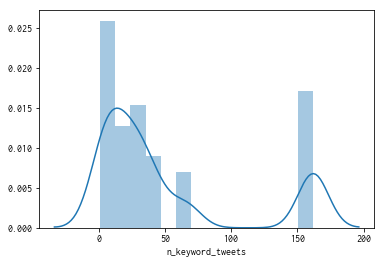

In [13]:
sns.distplot(datas['n_keyword_tweets'])

In [14]:
datas_unique.sort_values('n_keyword_tweets', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Sat Jul 07 23:50:11 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,0,@lustforanahi nao era nao.... acho q era algo ...,162
40,Fri Jul 06 21:41:02 +0000 2018,laulifreitas,laura cat,bom dia ...,103,148,9112,oi,0,vou entrar no wpp mais hoje n,66
7,Sat Jul 07 22:18:50 +0000 2018,valencianobele,Isabela🇧🇷,insta: valencianobele,755,698,4902,Oi,0,Vc é um bb — Ain ❤️ Eu sei kkkkk https://t.co/...,45
58,Thu Jul 05 20:20:16 +0000 2018,naoconceitual,cidade dorme,eu só tuito merda e falo mal da galera,264,115,2021,oi,1,@MariaExagero Te amo ♥,40
54,Fri Jul 06 03:51:59 +0000 2018,hogwaxtz,kulia,🦎,469,647,7691,ø,0,e o pior é q ele mora no mesmo prédio q eu e t...,34
1,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs,31
2,Sat Jul 07 23:26:25 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,i am the lord of loneliness\ni'll hold my brea...,28
57,Thu Jul 05 20:58:11 +0000 2018,jiminfpt,julia,big time rush eh melhor q bts,112,141,4052,NaN,0,@ilunochu quero,27
59,Thu Jul 05 15:55:03 +0000 2018,kou_msgw46,コウくぽぉ,主にモンスト、ガルパ、PUBGなどやってます( ¨̮ ) 僕にルシファーをください,143,47,1352,モンスト ホシ玉2連続ファントム（ *_* ）,1,@game_monstlove 本当にありがとうございます。,26
13,Sat Jul 07 16:20:18 +0000 2018,juvenson8,kalel rodrigues,Oi,60,11,849,oi,0,Gostei de um vídeo @YouTube https://t.co/OcW9S...,23


In [15]:
datas_unique['adress'].value_counts()

oi                                15
Oi                                 9
岐阜 恵那市                             5
岐阜県                                3
日本 岐阜                              3
恵那                                 3
岐阜 中津川市                            2
奈良県                                2
岐阜県中津川市                            2
Oi                                 1
愛知 津島市                             1
愛知県海部郡蟹江町                          1
岐阜県恵那市長島町正家1-1-25 ナカヤマビル 2階E号室     1
群馬 渋川市                             1
日本 岐阜      誕生日 1月30日               1
たぶん名古屋                             1
そこっ                                1
JAPAN                              1
モンスト ホシ玉2連続ファントム（ *_* ）            1
群馬県前橋市                             1
4100842 静岡県沼津市蛇松町                  1
JAPAN GIFU KURO-Eighty auto        1
豊田                                 1
三重 四日市市                            1
たじみ                                1
愛知県＆岐阜県                            1
赤味噌県                               1
岐

In [16]:
datas_unique[datas_unique['adress'] == 'oi']

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Sat Jul 07 23:50:11 +0000 2018,isaybp,isaybp,offsprimgs,104,108,10873,oi,0,@lustforanahi nao era nao.... acho q era algo ...,162
2,Sat Jul 07 23:26:25 +0000 2018,nicollassz,o i,2 dias sem tomar energetico,78,23,680,oi,0,i am the lord of loneliness\ni'll hold my brea...,28
11,Sat Jul 07 17:40:57 +0000 2018,btskccbeyo,HappyBirthday Alessia ❤,i wanna be happy. { fan account },220,358,3282,oi,0,@Camila_Cabello medo é o q define sempre,5
12,Sat Jul 07 16:51:34 +0000 2018,grahh_fraga,graziiis2,|| não sei nem o que que eu tô fazendo aqui ||,355,179,1142,oi,17,ai socorro https://t.co/Q6RyS4fzQ0,12
13,Sat Jul 07 16:20:18 +0000 2018,juvenson8,kalel rodrigues,Oi,60,11,849,oi,0,Gostei de um vídeo @YouTube https://t.co/OcW9S...,23
19,Sat Jul 07 12:43:37 +0000 2018,RodrigoSantso,Rodriigo Santos ;*,oi,1831,1076,2546,oi,0,última atualização de visitantes do meu perfil...,4
21,Sat Jul 07 11:27:24 +0000 2018,calabriajr1,calabriajr,:),72,24,21,oi,0,so chamar paqueta na proxima convocação,10
34,Sat Jul 07 02:29:41 +0000 2018,aozoraaaaaa,aozora,𝐥𝐞𝐠𝐚𝐥,54,24,34,oi,1,@indescision oh let me guess it's the tff rema...,14
40,Fri Jul 06 21:41:02 +0000 2018,laulifreitas,laura cat,bom dia ...,103,148,9112,oi,0,vou entrar no wpp mais hoje n,66
41,Fri Jul 06 21:12:47 +0000 2018,torresgabriel31,Gabriel Torres,oi,22,42,210,oi,1,"Vcs estão zoando comigo né, impossível https:/...",6


In [17]:
datas_unique[datas_unique['adress'] == 'Oi']

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
7,Sat Jul 07 22:18:50 +0000 2018,valencianobele,Isabela🇧🇷,insta: valencianobele,755,698,4902,Oi,0,Vc é um bb — Ain ❤️ Eu sei kkkkk https://t.co/...,45
8,Sat Jul 07 21:18:41 +0000 2018,Larissa_190,MISSquecê,mundo chato.,169,56,106,Oi,0,eu na mensagem/ como to por dentro https://t.c...,3
9,Sat Jul 07 20:17:11 +0000 2018,Har_ryJones,Harry,Ha u should u come down,307,410,396,Oi,8,Buildings just grown up Lego,1
32,Sat Jul 07 03:59:41 +0000 2018,eitamands,a manda,jem/ ws ❤️,1135,948,16935,Oi,0,MANO NAO CONSIGO PARAR DE RIR KKKKKKJKJKKJ htt...,6
42,Fri Jul 06 20:00:46 +0000 2018,Wxkke_,Ueiqui,15+ || PSN ID: Wxkke || #Fireball ||,345,453,2056,Oi,2,"Sdds Casemiro no lugar do Fernandinho, Tite fo...",1
45,Fri Jul 06 19:07:56 +0000 2018,lequisi,lexy,sem espaço pra gente mais chata do que eu,440,566,8683,Oi,0,"Isso é karma, não devia ter rido da cara dos u...",5
48,Fri Jul 06 12:16:49 +0000 2018,monxonex,X,그게되나 적당히 좋아하는게,22,0,227,Oi,0,내일 전시회보고 다운타우너갈까 뭐먹지 벌써행복,23
62,Thu Jul 05 11:41:55 +0000 2018,SpeedGamees,(Speed),Me Beija 3\nhttps://t.co/XdxKsxKkxa,135,113,2957,Oi,0,confira: https://t.co/jvkqehmGDQ,6
69,Wed Jul 04 18:20:29 +0000 2018,Jonas98925085,Jonas,Oi,27,0,4,Oi,0,"@cocielo Força man tmj, tudo passa sei q todo...",2


In [18]:
datas_unique[datas_unique['adress'] == 'Oi']

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
7,Sat Jul 07 22:18:50 +0000 2018,valencianobele,Isabela🇧🇷,insta: valencianobele,755,698,4902,Oi,0,Vc é um bb — Ain ❤️ Eu sei kkkkk https://t.co/...,45
8,Sat Jul 07 21:18:41 +0000 2018,Larissa_190,MISSquecê,mundo chato.,169,56,106,Oi,0,eu na mensagem/ como to por dentro https://t.c...,3
9,Sat Jul 07 20:17:11 +0000 2018,Har_ryJones,Harry,Ha u should u come down,307,410,396,Oi,8,Buildings just grown up Lego,1
32,Sat Jul 07 03:59:41 +0000 2018,eitamands,a manda,jem/ ws ❤️,1135,948,16935,Oi,0,MANO NAO CONSIGO PARAR DE RIR KKKKKKJKJKKJ htt...,6
42,Fri Jul 06 20:00:46 +0000 2018,Wxkke_,Ueiqui,15+ || PSN ID: Wxkke || #Fireball ||,345,453,2056,Oi,2,"Sdds Casemiro no lugar do Fernandinho, Tite fo...",1
45,Fri Jul 06 19:07:56 +0000 2018,lequisi,lexy,sem espaço pra gente mais chata do que eu,440,566,8683,Oi,0,"Isso é karma, não devia ter rido da cara dos u...",5
48,Fri Jul 06 12:16:49 +0000 2018,monxonex,X,그게되나 적당히 좋아하는게,22,0,227,Oi,0,내일 전시회보고 다운타우너갈까 뭐먹지 벌써행복,23
62,Thu Jul 05 11:41:55 +0000 2018,SpeedGamees,(Speed),Me Beija 3\nhttps://t.co/XdxKsxKkxa,135,113,2957,Oi,0,confira: https://t.co/jvkqehmGDQ,6
69,Wed Jul 04 18:20:29 +0000 2018,Jonas98925085,Jonas,Oi,27,0,4,Oi,0,"@cocielo Força man tmj, tudo passa sei q todo...",2


In [19]:
datas = datas[datas['adress'] != 'oi']
datas = datas[datas['adress'] != 'Oi']
datas = datas[datas['adress'] != 'OI']
datas = datas[datas['adress'] != 'oI']
datas = datas[datas['adress'] != 'Oi ']
datas = datas[datas['adress'] != 'ø']
datas = datas.reset_index(drop=True)

datas_unique = datas_unique[datas_unique['adress'] != 'oi']
datas_unique = datas_unique[datas_unique['adress'] != 'Oi']
datas_unique = datas_unique[datas_unique['adress'] != 'OI']
datas_unique = datas_unique[datas_unique['adress'] != 'oI']
datas_unique = datas_unique[datas_unique['adress'] != 'Oi ']
datas_unique = datas_unique[datas_unique['adress'] != 'ø']
datas_unique = datas_unique.reset_index(drop=True)

In [20]:
datas_unique['adress'].value_counts()

岐阜 恵那市                            5
日本 岐阜                             3
岐阜県                               3
恵那                                3
岐阜 中津川市                           2
奈良県                               2
岐阜県中津川市                           2
たぶん名古屋                            1
4100842 静岡県沼津市蛇松町                 1
無言フォロー失礼します                       1
愛知 名古屋市 中区                        1
ゲームセンターひさくんち                      1
名古屋市                              1
JAPAN GIFU KURO-Eighty auto       1
豊田                                1
mine県craft市                       1
岐阜県中津川市千旦林1277-9                  1
たじみ                               1
愛知県＆岐阜県                           1
赤味噌県                              1
岐阜県恵那市長島町正家1丁目１－２５                1
崖下リージョン                           1
橘ありすと緒方智絵里の間                      1
愛知県                               1
群馬 渋川市                            1
モンスト ホシ玉2連続ファントム（ *_* ）           1
千葉県柏市                             1
岐阜                          

In [21]:
datas.sort_values('n_keyword_tweets', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs,31
128,Thu Jul 05 06:38:44 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,2,@Ninja1000_2014 了解👌,31
130,Thu Jul 05 06:34:21 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,4,@katu_moto @kazu_z1000 シャモジで食べるのはやめなさい😘❌,31
159,Wed Jul 04 14:45:45 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,39,皆さまおはよう御座いますぅ！\nギリギリセーフ‼️\nいぬ年の私です、\n分かってはいるので...,31
157,Wed Jul 04 15:09:28 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,0,@kitaoka83 ワン‼️,31
156,Wed Jul 04 16:08:06 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,1,@katu_moto 仕事はどうですか？,31
154,Wed Jul 04 21:51:19 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,1,@katu_moto おーけー👍,31
153,Wed Jul 04 21:52:46 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,2,@tapchips1 今日は塩分控えめに‼️ https://t.co/3SR80E6NXe,31
152,Wed Jul 04 21:55:08 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,0,@yoshidakun8 ヨシダさん(^｡^)\nおはよう御座います！\n取り敢えず今日も警...,31
151,Wed Jul 04 21:58:32 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,3,@fojy2061 タカさん(^｡^)\nおはよう御座います！\n常に何かあるから頑張れるん...,31


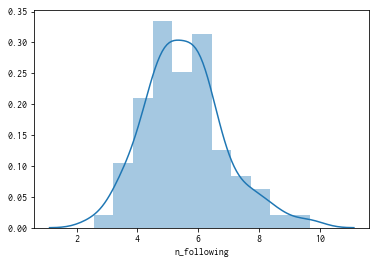

In [22]:
sns.distplot(np.log1p(datas_unique['n_following']))

In [23]:
datas_unique.sort_values(by='n_following', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
20,Sat Jul 07 04:31:17 +0000 2018,satohayato_tw,佐藤勇人,NaN,15685,15038,567,愛知県春日井市,0,ラーメンなる木のネギらーめん 場所: ラーメンなる木 https://t.co/G1RNRf...,1
14,Sat Jul 07 10:17:41 +0000 2018,holicdaisuki,大室櫻子@さくなでlove,配信者です。 将来の夢は配信業 師匠→@akaneniconico,6416,6409,15186,mine県craft市,1,@usiuna7991 今年はムーンライトながらに乗らないんですか？,4
26,Fri Jul 06 22:00:59 +0000 2018,PerroRhythm,内浦のエマ・ワトソン@Aqours 3rd 福岡両日御礼,#WRXSTI で #千葉ロッテ #FC東京 #Aqours #内浦のエマ・ワトソン と #...,4271,1845,14164,4100842 静岡県沼津市蛇松町,1,とりあえず福岡へ向かって飛んでくれてます https://t.co/WviegFcdNh,1
31,Fri Jul 06 06:03:04 +0000 2018,kitouy317,ナギサ(｀・ω,LINEとかもしてます。 気軽に話しかけてください！頭文字dzero 銀河の神姫 YouTu...,3097,1531,4854,岐阜 恵那市,1,いよいよ明日から名古屋でオートフェスが開かれる٩(*´︶`*)۶\nぅちは、日曜にいくよー！...,1
5,Sat Jul 07 18:09:38 +0000 2018,mayakoyayoilove,☆絶狼☆ @15日 秋葉原,やよい、杏、智絵里、かな子、卯月、仁奈、芳乃、夕美、みく、薫、歌鈴、響子、未来、星梨花、育、...,2511,2088,110336,橘ありすと緒方智絵里の間,0,帰路 ｲﾏｺｺ! L:、 岐阜県中津川市千旦林 国道19号線 &amp; 中山道 #imac...,3
33,Fri Jul 06 01:32:35 +0000 2018,maru_Connection,maru@はいぇ〜す,ハイエース/L700/CB750/全国箱車連合/Connection/一眼/岐阜/無言フォロ...,1999,2184,6150,岐阜 恵那市,0,@manaPooh_1023 携帯の設定とちがうん？笑笑\n\n情報も平等にって笑笑,15
62,Mon Jul 02 06:48:47 +0000 2018,kayakuniv,名門カヤック大学,はじめまして、 3年前まで東京の自動車メーカーで海外営業をしておりましたが、 退職し私の生...,1993,530,4286,岐阜県中津川市,0,富士見台高原で\nササユリの開花状況の確認と\n保護杭を打ち込んできましたよ！！ 場所: N...,1
6,Sat Jul 07 15:14:49 +0000 2018,SDKASMT_AISR,まあ@,NaN,1263,797,59663,NaN,1,@calora2seikai 大垣の別宅も水没の危険があったのでそのまま出ちゃいました,1
22,Sat Jul 07 02:17:20 +0000 2018,ohisian319,Abbey ❤️,I like hugs. :3,1191,275,3506,日本 岐阜,0,電車も可愛い！😍 #恵那市 #明知鉄道 #岩村へ行こう 場所: 明智鉄道恵那駅 https:...,2
71,Sun Jul 01 12:18:39 +0000 2018,overflags01,名前はまだない(23),吾輩は社畜(いぬ)である。名前はまだない。\n\n「花のいろは 移りにけりな いたづらに 我...,928,1270,61265,NaN,0,@izumi_yorin ようりんさんまで…😇,1


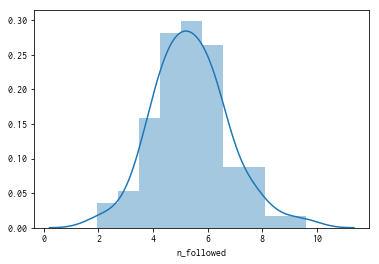

In [24]:
sns.distplot(np.log1p(datas_unique['n_followed']))

In [25]:
datas_unique.sort_values(by='n_followed', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
20,Sat Jul 07 04:31:17 +0000 2018,satohayato_tw,佐藤勇人,NaN,15685,15038,567,愛知県春日井市,0,ラーメンなる木のネギらーめん 場所: ラーメンなる木 https://t.co/G1RNRf...,1
14,Sat Jul 07 10:17:41 +0000 2018,holicdaisuki,大室櫻子@さくなでlove,配信者です。 将来の夢は配信業 師匠→@akaneniconico,6416,6409,15186,mine県craft市,1,@usiuna7991 今年はムーンライトながらに乗らないんですか？,4
57,Tue Jul 03 04:38:09 +0000 2018,DuomoPen,輸入万年筆のIl Duomo,文具好きが高じて輸入万年筆屋IlDuomoを立ち上げました。中の人です。\n取り扱い文具は5...,901,3162,1928,岐阜 恵那市,1,そんな思いを込めて発送しています。\n今回のは……ほんとに………\nお嫁に出すのが惜しいくら...,3
33,Fri Jul 06 01:32:35 +0000 2018,maru_Connection,maru@はいぇ〜す,ハイエース/L700/CB750/全国箱車連合/Connection/一眼/岐阜/無言フォロ...,1999,2184,6150,岐阜 恵那市,0,@manaPooh_1023 携帯の設定とちがうん？笑笑\n\n情報も平等にって笑笑,15
5,Sat Jul 07 18:09:38 +0000 2018,mayakoyayoilove,☆絶狼☆ @15日 秋葉原,やよい、杏、智絵里、かな子、卯月、仁奈、芳乃、夕美、みく、薫、歌鈴、響子、未来、星梨花、育、...,2511,2088,110336,橘ありすと緒方智絵里の間,0,帰路 ｲﾏｺｺ! L:、 岐阜県中津川市千旦林 国道19号線 &amp; 中山道 #imac...,3
26,Fri Jul 06 22:00:59 +0000 2018,PerroRhythm,内浦のエマ・ワトソン@Aqours 3rd 福岡両日御礼,#WRXSTI で #千葉ロッテ #FC東京 #Aqours #内浦のエマ・ワトソン と #...,4271,1845,14164,4100842 静岡県沼津市蛇松町,1,とりあえず福岡へ向かって飛んでくれてます https://t.co/WviegFcdNh,1
31,Fri Jul 06 06:03:04 +0000 2018,kitouy317,ナギサ(｀・ω,LINEとかもしてます。 気軽に話しかけてください！頭文字dzero 銀河の神姫 YouTu...,3097,1531,4854,岐阜 恵那市,1,いよいよ明日から名古屋でオートフェスが開かれる٩(*´︶`*)۶\nぅちは、日曜にいくよー！...,1
71,Sun Jul 01 12:18:39 +0000 2018,overflags01,名前はまだない(23),吾輩は社畜(いぬ)である。名前はまだない。\n\n「花のいろは 移りにけりな いたづらに 我...,928,1270,61265,NaN,0,@izumi_yorin ようりんさんまで…😇,1
49,Tue Jul 03 10:56:15 +0000 2018,Shop_Manantial,MANANTIAL（マナンティアール）,豊かな自然に囲まれた岐阜県中津川市にある小さな工房で天然石アクセサリーを制作しています。,518,875,1134,岐阜県中津川市千旦林1277-9,14,工房の駐車場の片隅に『草花火』が咲いています🌼\n何も手をかけていないのですが、毎年きれいな...,1
6,Sat Jul 07 15:14:49 +0000 2018,SDKASMT_AISR,まあ@,NaN,1263,797,59663,NaN,1,@calora2seikai 大垣の別宅も水没の危険があったのでそのまま出ちゃいました,1


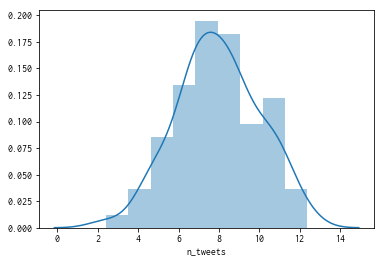

In [26]:
sns.distplot(np.log1p(datas_unique['n_tweets']))

In [27]:
datas_unique.sort_values(by='n_tweets', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
64,Mon Jul 02 02:41:38 +0000 2018,sagittarius_82,サジタリウス,崖下紳士。って言葉に何か感じるものがあったあなたとは仲良くなれそうな気がする。こうみえて35...,648,512,238300,崖下リージョン,0,さて、長野目指して再出発,6
27,Fri Jul 06 18:57:19 +0000 2018,dampedia,神馬シン＠ダムマイスター【公式】,ダム愛好家／ダムペディア管理人／(一財)日本ダム協会認定ダムマイスター≪一般≫／水神(雨男)...,288,684,151613,愛知県海部郡蟹江町,0,"通行止のため強制流出 (@ 中津川IC in 中津川市, 岐阜県) https://t.co...",1
5,Sat Jul 07 18:09:38 +0000 2018,mayakoyayoilove,☆絶狼☆ @15日 秋葉原,やよい、杏、智絵里、かな子、卯月、仁奈、芳乃、夕美、みく、薫、歌鈴、響子、未来、星梨花、育、...,2511,2088,110336,橘ありすと緒方智絵里の間,0,帰路 ｲﾏｺｺ! L:、 岐阜県中津川市千旦林 国道19号線 &amp; 中山道 #imac...,3
4,Sat Jul 07 22:57:16 +0000 2018,hisa_kun,ひさくん,DDR/PIU/ITG/EZ2DJ/EZ2AC/筐体2台持ち/マルチ音ゲーマー/DS4 詳...,591,613,66373,ゲームセンターひさくんち,0,ちゃり鴎外 (@ ファミリーマート 中津川インター店 - @famima_now in 中津...,1
71,Sun Jul 01 12:18:39 +0000 2018,overflags01,名前はまだない(23),吾輩は社畜(いぬ)である。名前はまだない。\n\n「花のいろは 移りにけりな いたづらに 我...,928,1270,61265,NaN,0,@izumi_yorin ようりんさんまで…😇,1
6,Sat Jul 07 15:14:49 +0000 2018,SDKASMT_AISR,まあ@,NaN,1263,797,59663,NaN,1,@calora2seikai 大垣の別宅も水没の危険があったのでそのまま出ちゃいました,1
29,Fri Jul 06 10:59:49 +0000 2018,qrossover,Qross,道の駅完全制覇継続中。アクティブなひきこもりを地で行くおっさnです。 酒と旅の日々。 Bye...,125,186,52458,たじみ,0,ｲﾏｺｺ! L:岐阜県中津川市茄子川[ImacocoNow! Android],2
54,Tue Jul 03 07:18:28 +0000 2018,minaminng,さいきみなみ,夫がうつ病。 私はうつ寛解。 \n長男就職決まらず\n次男ひきこもり\n三男四男単位制高校…...,321,382,51353,奈良県,1,「半分青い」\nラッピング電車\n一両編成\n走ってた(°_°)！\n恵那(°_°)？,1
50,Tue Jul 03 09:49:48 +0000 2018,hisakkyan,HISASHI,主にチャオ ベッラ チンクエッティ(THE ポッシボー)、舞台、テレビ、日常などについてゆる...,396,316,44272,岐阜 中津川市,0,丸亀製麺でぶっかけうどん(冷)大(*´ー｀*) 場所: 中津川 https://t.co/s...,1
52,Tue Jul 03 09:04:26 +0000 2018,kawakappa,ダイヤモン豆腐@R1,"26歳の発達障害当事者。ASD,ADHD混合。\n発達障害が生きやすい社会、働きやすい職場を...",473,325,38157,名古屋市,0,さてぼちぼち帰りますか。,4


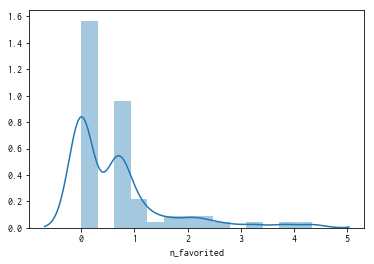

In [28]:
sns.distplot(np.log1p(datas_unique['n_favorited']))

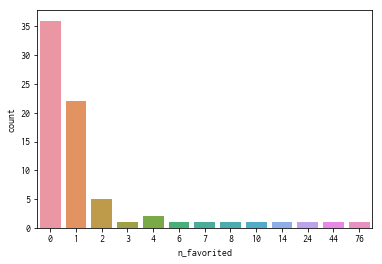

In [29]:
sns.countplot(datas_unique['n_favorited'])

In [30]:
datas_unique.sort_values(by='n_favorited', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
12,Sat Jul 07 10:40:16 +0000 2018,velopscom,VeLops@岐阜県恵那市のVapeShop,Vape Shop VeLops 岐阜県恵那市の電子タバコVAPEの専門店 便利に使えるマ...,200,194,490,岐阜県恵那市長島町正家1-1-25 ナカヤマビル 2階E号室,76,VapeShopVeLops 無事オープン初日を迎えることができました。\n東京上野のSAM...,11
0,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs,31
2,Sat Jul 07 23:04:41 +0000 2018,mgr0419,ＣＯＺＹ=メルセデス＋アウディ＋アクア❤️,#車／#ミニカー／#腕時計／#水曜どうでしょう 2018.4/15 ８ＮアウディＴＴロードス...,259,290,7978,三重 津市,24,恵那峡SAなう。これから向かいます！\n#ゆーるピアンで会いましょう https://t.c...,1
49,Tue Jul 03 10:56:15 +0000 2018,Shop_Manantial,MANANTIAL（マナンティアール）,豊かな自然に囲まれた岐阜県中津川市にある小さな工房で天然石アクセサリーを制作しています。,518,875,1134,岐阜県中津川市千旦林1277-9,14,工房の駐車場の片隅に『草花火』が咲いています🌼\n何も手をかけていないのですが、毎年きれいな...,1
18,Sat Jul 07 07:28:36 +0000 2018,STOyuiST,STOyuiST隊長,ドハマリしすぎて #釣り に行きやすい車に乗り換え完了♡🎣 #釣り仕様 の #DA17W に...,34,30,305,NaN,10,無事にお豆腐も買えて\nゆっくりぜんざいtime❤\nひさびさにいい時間過ごしてるかも✨お天...,1
56,Tue Jul 03 04:39:43 +0000 2018,saphia_bell,サフィア@Fenrir（ダクソプレイ中）,FF14/フェンリル鯖/Saphia Bell(サフィア・ベル)/学者メイン、サブ戦士のララ...,466,393,37479,エオルゼア,8,みむらランチー！ https://t.co/SknfnSlB9j,1
66,Mon Jul 02 00:23:13 +0000 2018,NH01111552,NH,きよしさん、デビューからの大、大好き💕です。微力ですが応援👊😄📢をさせて頂いております。夫に...,99,108,11447,日本 岐阜 誕生日 1月30日,7,@mt_ekou kirarinさん \nありがとうございます😊\n\nご無沙汰してます～...,1
16,Sat Jul 07 07:45:20 +0000 2018,hafadaida,はふぁだい,心に響くアーティストさんを応援しています。 \n 貝、ウニ、めんたいこ、キムチはごめんなさい...,368,388,21585,赤味噌県,6,リハ中で入場出来ず席とれない(&gt;_&lt;)\n71ならどこでもいいか😂 https:...,1
69,Sun Jul 01 12:59:24 +0000 2018,JOE_Kintetsu,じょーのすけ🇩🇪🇨🇭,三滝→KL/学校行ってません。ニートです。7月より行きます。スノーボードをしている元gray...,60,82,1191,三重 四日市市,4,@nippachi_vh @kita_love1926 @shimakaze126 面縦しか...,3
21,Sat Jul 07 03:10:49 +0000 2018,taiga1211_k1,taiga,モンスト 荒野行動 やってます,84,44,614,岐阜県,4,そろそろ950メートル降り\n覚えないと怒られちゃうw,9


In [37]:
datas

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Sat Jul 07 23:35:31 +0000 2018,4548tmhsv,板前ライダー(大将),岐阜県恵那市で飲食店を営んでおります板前ライダーです。席だけの予約も出来るのでツーリング中の...,346,556,4324,岐阜 恵那市,44,久々の青空です！ https://t.co/oRxt6cpOXs,31
1,Sat Jul 07 23:24:08 +0000 2018,kaipiroshi,甲斐ヒロシ,関西出身で現在は愛知県在住。唄うたいとして、土日を中心に細々と音楽活動してます。,77,73,971,愛知 津島市,0,もう…逃げ場がないね。\nhttps://t.co/Jz6mh4IWQk,3
2,Sat Jul 07 23:04:41 +0000 2018,mgr0419,ＣＯＺＹ=メルセデス＋アウディ＋アクア❤️,#車／#ミニカー／#腕時計／#水曜どうでしょう 2018.4/15 ８ＮアウディＴＴロードス...,259,290,7978,三重 津市,24,恵那峡SAなう。これから向かいます！\n#ゆーるピアンで会いましょう https://t.c...,1
3,Sat Jul 07 23:01:15 +0000 2018,Geri__P,げりP 次はどこ行くべ,心の中は12歳。ビールになりたいよ。日本一周2015年組。GSR400と一周。ブログは気が向...,153,122,5340,NaN,0,おはようございます\n赤ちゃんの泣き声に呼応して猫が喧嘩しだしてカオス,6
4,Sat Jul 07 22:57:16 +0000 2018,hisa_kun,ひさくん,DDR/PIU/ITG/EZ2DJ/EZ2AC/筐体2台持ち/マルチ音ゲーマー/DS4 詳...,591,613,66373,ゲームセンターひさくんち,0,ちゃり鴎外 (@ ファミリーマート 中津川インター店 - @famima_now in 中津...,1
5,Sat Jul 07 18:09:38 +0000 2018,mayakoyayoilove,☆絶狼☆ @15日 秋葉原,やよい、杏、智絵里、かな子、卯月、仁奈、芳乃、夕美、みく、薫、歌鈴、響子、未来、星梨花、育、...,2511,2088,110336,橘ありすと緒方智絵里の間,0,帰路 ｲﾏｺｺ! L:、 岐阜県中津川市千旦林 国道19号線 &amp; 中山道 #imac...,3
6,Sat Jul 07 17:59:21 +0000 2018,mayakoyayoilove,☆絶狼☆ @15日 秋葉原,やよい、杏、智絵里、かな子、卯月、仁奈、芳乃、夕美、みく、薫、歌鈴、響子、未来、星梨花、育、...,2511,2088,110336,橘ありすと緒方智絵里の間,0,帰路 ｲﾏｺｺ! L:、 岐阜県恵那市大井町 #imacoconow [ImacocoNow...,3
7,Sat Jul 07 16:30:24 +0000 2018,kaipiroshi,甲斐ヒロシ,関西出身で現在は愛知県在住。唄うたいとして、土日を中心に細々と音楽活動してます。,77,73,971,愛知 津島市,0,よく降るね。\nhttps://t.co/haZuWroAMB,3
8,Sat Jul 07 16:21:59 +0000 2018,Geri__P,げりP 次はどこ行くべ,心の中は12歳。ビールになりたいよ。日本一周2015年組。GSR400と一周。ブログは気が向...,153,122,5340,NaN,0,そこばっかり攻撃するのやめろや https://t.co/sUtO74tpaX,6
9,Sat Jul 07 16:14:20 +0000 2018,Geri__P,げりP 次はどこ行くべ,心の中は12歳。ビールになりたいよ。日本一周2015年組。GSR400と一周。ブログは気が向...,153,122,5340,NaN,0,長良川中流の雨が止みませんね,6


# キーワードと共にツイートされることが多かった単語

In [31]:
import MeCab
import re

m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
word_list = []
for i in range(datas.shape[0]):
    if type(datas.text[i]) == str:
        texts = m.parse(datas['text'][i])
        texts = texts.split('\n')
        for text in texts:
            text = re.split('[\t,]', text)
            if text[0] == 'EOS' or text[0] == '':
                pass
            elif text[1] == '名詞' and text[2] == '一般': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == 'サ変接続': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == '形容動詞語幹': 
                word_list.append(text[0])
            elif text[1] == '形容詞' and text[2] == '自立': 
                word_list.append(text[0])

In [32]:
from collections import Counter

counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

場所 16
ー 9
オープン 9
in 8
いい 8
おはよう 6
雨 5
ルビットタウン 5
青い 5
w 5
気 5
ｲﾏｺｺ 4
写真 4
💕 4
👍 4
可愛い 4
買上 4
警報 4
無理 4
よかっ 4
VapeShopVeLops 4
登山 4
自然 4
ない 3
無事 3
ショーケース 3
😍 3
心 3
相棒 3
ドスケベ 3
ぅ 3
感じ 3
情報 3
好き 3
vou 3
e 3
q 3
お願い 3
ﾜﾀｼ 3
自分 3
b 3
悪い 3
いや 3
☔ 3
mHi 3
楽しい 3
連続 3
ﾆﾀｯ 3
すごい 3
風 3
😆 3
商品 3
気持ち 3
😭 3
歯 3
最高 3
久々 2
青空 2
なう 2
ゆ 2
インター 2
カフェ 2
出動 2
大丈夫 2
クラフト 2
楽しみ 2
ツーショット 2
雲 2
ぜんざい 2
なかっ 2
会い 2
ラーメン 2
木 2
鉄道 2
えな 2
め 2
診断 2
🎵 2
測定 2
土 2
プレゼント 2
ガイジ 2
トーシ 2
ほんと 2
mds 2
n 2
um 2
💓 2
eles 2
hades 2
filha 2
o 2
避難 2
種菌 2
警部 2
是非 2
記念 2
急 2
来店 2
嬉しい 2
フルムーン 2
メイン 2
申し訳ない 2
お客様 2
悪天候 2
子 2
😘 2
うち 2
元気 2
✌ 2
大雨 2
ラウンジ 2
神様 2
事件 2
エロ 2
もめ事 2
苦笑 2
皆さま 2
大変 2
暑い 2
s 2
nu 2
ミサイル 2
説明 2
強い 2
切手シート 2
パワー 2
up 2
陳列 2
素敵 2
草花 2
花 2
作用 2
嫁 2
武器 2
水道 2
節水 2
地域 2
👏 2
逃げ場 1
ピアン 1
赤ちゃん 1
泣き声 1
呼応 1
猫 1
喧嘩 1
カオス 1
ちゃり 1
中山道 1
攻撃 1
中流 1
別宅 1
水没 1
危険 1
牧場 1
投稿 1
Z 1
泊り 1
怖い 1
大人 1
😨 1
ヤマゴヤ 1
cUt 1
デビュー 1
ただ 1
酒 1
辛い 1
ダウン 1
作り方 1
ひどく 1
ライトアップ 1
歌 1
良かっ 1
初日 1
VAPORS 1
人形 1
ちゃ 1
高校 1
先輩 1
北 1
AQwxw 1
体制 1
ピイシーズ 1
すずめ

In [33]:
stop_words = ['in', 'ー', 'bot', '場所']#, 'ない', '無い']

def remove_specified_values(arr, value):
    while value in arr:
        arr.remove(value)

for word in stop_words:
    remove_specified_values(word_list, word)

In [34]:
counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

オープン 9
いい 8
おはよう 6
雨 5
ルビットタウン 5
青い 5
w 5
気 5
ｲﾏｺｺ 4
写真 4
💕 4
👍 4
可愛い 4
買上 4
警報 4
無理 4
よかっ 4
VapeShopVeLops 4
登山 4
自然 4
ない 3
無事 3
ショーケース 3
😍 3
心 3
相棒 3
ドスケベ 3
ぅ 3
感じ 3
情報 3
好き 3
vou 3
e 3
q 3
お願い 3
ﾜﾀｼ 3
自分 3
b 3
悪い 3
いや 3
☔ 3
mHi 3
楽しい 3
連続 3
ﾆﾀｯ 3
すごい 3
風 3
😆 3
商品 3
気持ち 3
😭 3
歯 3
最高 3
久々 2
青空 2
なう 2
ゆ 2
インター 2
カフェ 2
出動 2
大丈夫 2
クラフト 2
楽しみ 2
ツーショット 2
雲 2
ぜんざい 2
なかっ 2
会い 2
ラーメン 2
木 2
鉄道 2
えな 2
め 2
診断 2
🎵 2
測定 2
土 2
プレゼント 2
ガイジ 2
トーシ 2
ほんと 2
mds 2
n 2
um 2
💓 2
eles 2
hades 2
filha 2
o 2
避難 2
種菌 2
警部 2
是非 2
記念 2
急 2
来店 2
嬉しい 2
フルムーン 2
メイン 2
申し訳ない 2
お客様 2
悪天候 2
子 2
😘 2
うち 2
元気 2
✌ 2
大雨 2
ラウンジ 2
神様 2
事件 2
エロ 2
もめ事 2
苦笑 2
皆さま 2
大変 2
暑い 2
s 2
nu 2
ミサイル 2
説明 2
強い 2
切手シート 2
パワー 2
up 2
陳列 2
素敵 2
草花 2
花 2
作用 2
嫁 2
武器 2
水道 2
節水 2
地域 2
👏 2
逃げ場 1
ピアン 1
赤ちゃん 1
泣き声 1
呼応 1
猫 1
喧嘩 1
カオス 1
ちゃり 1
中山道 1
攻撃 1
中流 1
別宅 1
水没 1
危険 1
牧場 1
投稿 1
Z 1
泊り 1
怖い 1
大人 1
😨 1
ヤマゴヤ 1
cUt 1
デビュー 1
ただ 1
酒 1
辛い 1
ダウン 1
作り方 1
ひどく 1
ライトアップ 1
歌 1
良かっ 1
初日 1
VAPORS 1
人形 1
ちゃ 1
高校 1
先輩 1
北 1
AQwxw 1
体制 1
ピイシーズ 1
すずめ 1
出て 1
きた 1
危異

In [35]:
word_list = ' '.join(word_list)

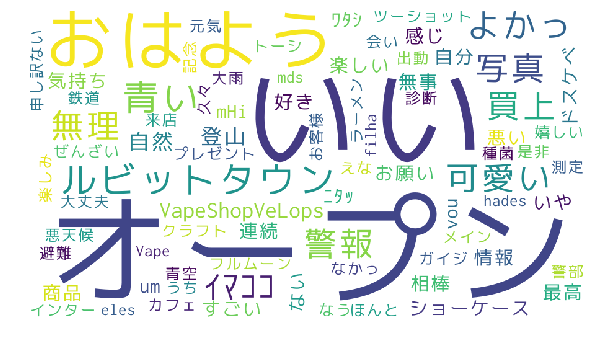

In [36]:
from wordcloud import WordCloud

fpath = "~/Library/Fonts/RictyDiminished-Regular.ttf"

wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, max_words=80).generate(word_list)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(outfile)
plt.show()
#一文字の単語は表示してくれない...